In [128]:
#data manipulation packages
import pandas as pd
import numpy as np
from scipy import stats
import re

#visualization tools
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)

#### calendar.csv - Contains information about the dates on which the products are sold.
#### sales_train_validation.csv - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
#### sample_submission.csv - The correct format for submissions. Reference the Evaluation tab for more info.
#### sell_prices.csv - Contains information about the price of the products sold per store and date.

In [17]:
cal = pd.read_csv('calendar.csv', parse_dates = ['date'])
sales = pd.read_csv('sales_train_validation.csv')
prices = pd.read_csv('sell_prices.csv')

print(cal.shape)
print(sales.shape)
print(prices.shape)

(1969, 14)
(30490, 1919)
(6841121, 4)


In [101]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [102]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [24]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


### Let's first explore the Sales Dataset

Since both Sales and Cal dataframes both share 'd_' values, let's merge them together so we can create an informed time series plot with actual date values.

In [315]:
colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
d_cols = [col for col in sales.columns if 'd_' in col]

def plot_item(item_id):
    '''Plot the selling history of "item" by day, month, and year.
    
    Args:
        item(str): id of the item we are wanting to plot.
    
    Returns:
        matplotlib plot object of item sale history
    '''
    global item
    item = 'FOODS_3_090_CA_3'
    
    item_df = sales.loc[sales['id'] == item_id][d_cols].T
    item_df = item_df.rename(columns={sales.index[sales['id']==item_id].to_list()[0]:item_id}) # Name it correctly
    item_df = item_df.reset_index().rename(columns={'index': 'd'}) # make the index "d"
    item_df = item_df.merge(cal, how='left', validate='1:1')

    fig, axes = plt.subplots(1, 1, figsize=(15, 6), dpi=100)
    item_df[['date', item_id]].set_index('date').resample('D').mean()[item_id].plot(ax=axes, label='By day', alpha=0.8).set_ylabel('Amount of Item Sold', fontsize=14);
    item_df[['date', item_id]].set_index('date').resample('M').mean()[item_id].plot(ax=axes, label='By month', alpha=1).set_ylabel('Amount of Item Sold', fontsize=14);
    item_df[['date', item_id]].set_index('date').resample('Y').mean()[item_id].plot(ax=axes, label='By year', alpha=1).set_ylabel('Amount of Item Sold', fontsize=14);
    axes.set_title('Mean '+str(item_id)+ ' sold by hour, day and month', fontsize=16);
    axes.legend()

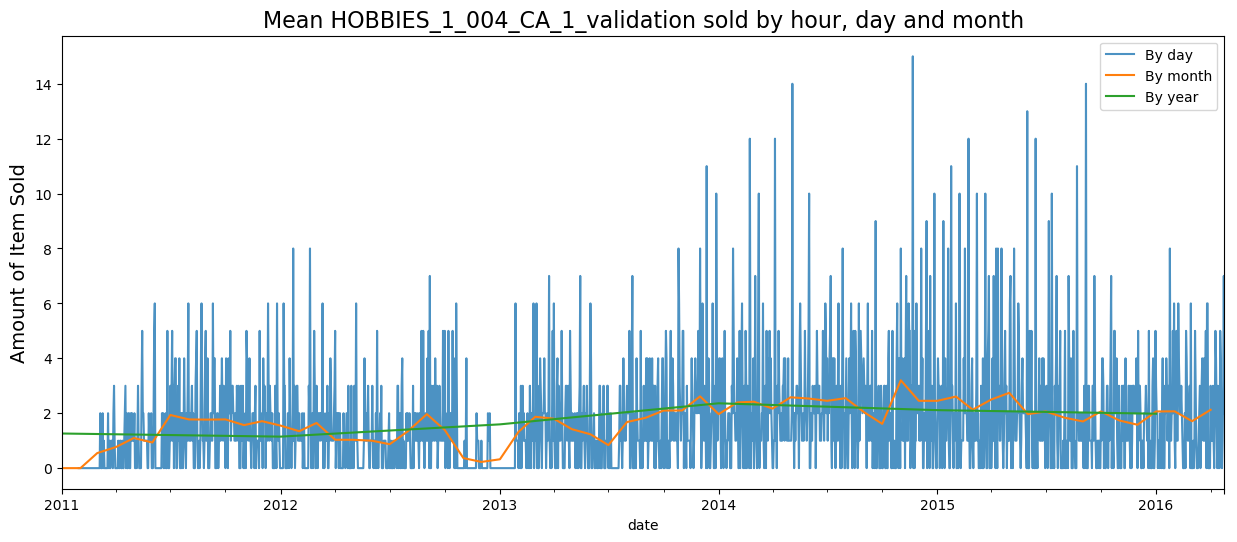

In [316]:
plot_item('HOBBIES_1_004_CA_1_validation')

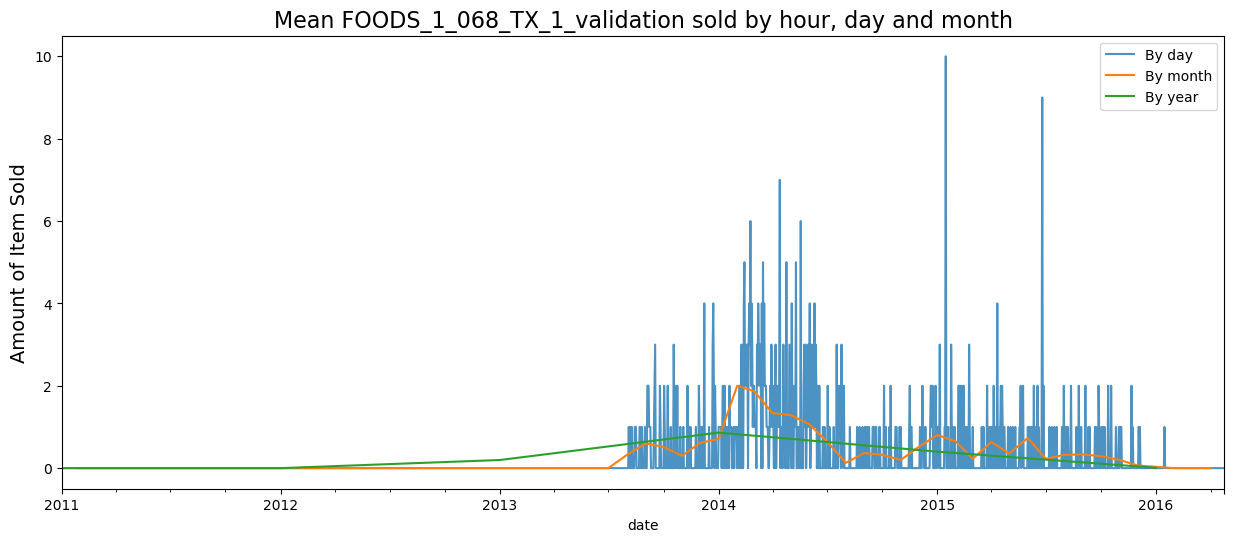

In [323]:
plot_item('FOODS_1_068_TX_1_validation')

We can see from some of our plots that some of the items weren't sold throughout the entire date range. We will need to fix this so our data isn't skewed.

In [ ]:
limited_items = []

for item_id in sales['id']:
    df = sales.loc[sales['id'] == item_id][d_cols].T
    df = df.rename(columns={sales.index[sales['id']==item_id].to_list()[0]:item_id}) # Name it correctly
    df = df.reset_index().rename(columns={'index': 'd'}) # make the index "d"
    df = df.merge(cal, how='left', validate='1:1')
    
    if any((df.iloc[:,1].rolling(200)).sum())==0:
        limited_items.append(item_id)
    else:
        continue

Now that we have a function that plots the selling history of an item, let's look at them from a category perspective; Let's sum these items by category to better understand which category of items have high volume of sales.

In [206]:
def agg_plot(*args):
    '''Plot the selling history of items aggregated by categories.
    
    Args:
        category(str): item(s) type as described by the id column (i.e. HOBBIES, HOUSEHOLD, FOODS).
    
    Returns:
        matplotlib plot object of category sale history
    '''
    temp = sales.copy()
    temp['item_cat'] = temp['id'].str.split('_',1).str.get(0).str.lower()
    
    if len(args)==1:
        cat_df = temp[temp['item_cat']==args[0]][d_cols]
        cat_totals = cat_df.sum(axis=0).T

        cat_totals.plot(figsize=(14,10), title = str(args[0])+'_aggregated', color = next(colors))
        plt.legend('')
        plt.show()

    else:
        aggs = []
        for i in args:
            cat_df = temp[temp['item_cat']==i][d_cols]
            aggs.append(np.asarray(cat_df.sum(axis=0).T))
        plt.figure(figsize=(14,10))
        for x in aggs:
            vis = plt.plot(x)
            vis = plt.xlabel('Day Sold')
            vis = plt.ylabel('Amount of Items Sold')
        plt.legend([i for i in args])
        plt.show()

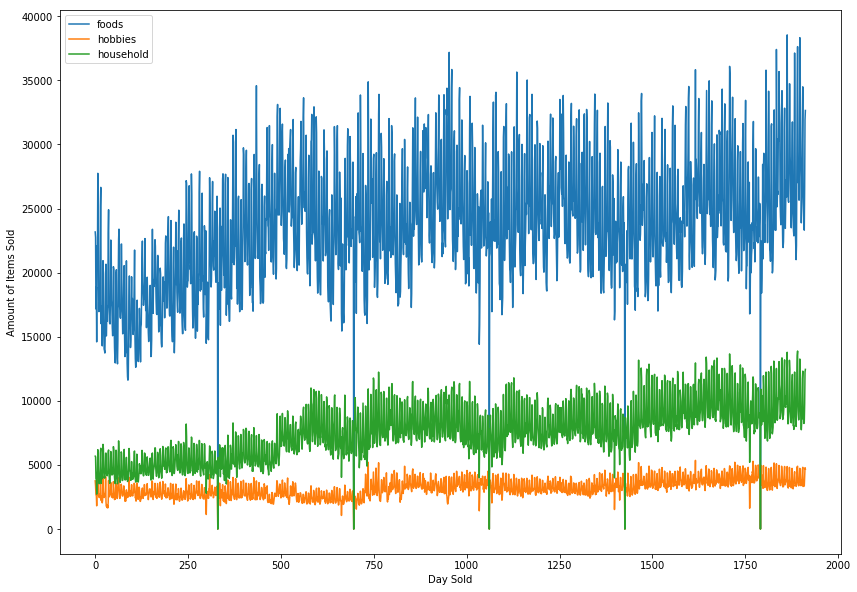

In [207]:
agg_plot('foods','hobbies','household')

We can see that Food items are sold consistantly more often than the other categories. On the other hand, even though items in hobbies are sold less frequently, the series is much less noisy than the other categories. The categories seem to have very similar seasonal/cyclical fluctuations; no lead/lag relationship.

Let's reduce the number of categories to see if we can index on any trends. Reducing the categories will reduce the y axis range, so trends should be more pronounced.

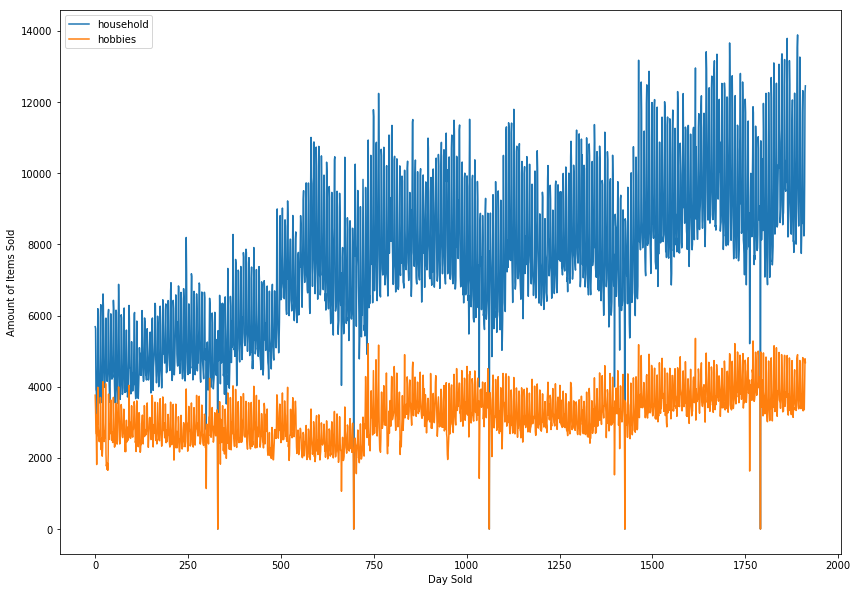

In [214]:
agg_plot('household', 'hobbies')

We can see that 'household' has a moderate upwards trend, whereas 'hobbies' consolidates in the 3,000/low 4,000 items per day range.

In [266]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
